In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Get Data

In [184]:
df_kend_train = pd.read_csv('./dataset/kendaraan_train.csv')
df_kend_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [185]:
# delete id karena tidak berguna
del df_kend_train['id']
del df_kend_train['Tertarik']
df_kend_train.dtypes

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
dtype: object

## Preprocessing: Drop Duplicate Data

In [186]:
print("Total Data Sebelum di Duplicate: ", len(df_kend_train))
print("Total Duplicate Data: ", list(df_kend_train.duplicated()).count(True))
df_kend_train.drop_duplicates(inplace=True)
print("Total Data Setelah di Duplicate: ", len(df_kend_train))
df_kend_train.head()

Total Data Sebelum di Duplicate:  285831
Total Duplicate Data:  198
Total Data Setelah di Duplicate:  285633


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


## Preprocessing: Label Encoding (One Hot Encoding)

In [187]:
# df_kend_train['Jenis_Kelamin'] = df_kend_train['Jenis_Kelamin'].fillna('Others')
# y = OneHotEncoder(sparse=False)
# y = y.fit_transform(df_kend_train[['Jenis_Kelamin']])
# df_y = pd.DataFrame(y)
# df_y
# header = df_kend_train['Jenis_Kelamin'].sort_values()
# header
# df_y.columns = 'Jenis_Kelamin_'+header
labelencoder = LabelEncoder()
def enc(type, change):
  df_kend_train[type] = labelencoder.fit_transform(df_kend_train[type])
  df_kend_train[type] = df_kend_train[type].replace(change, np.NaN)

# df_kend_train['Jenis_Kelamin'] = labelencoder.fit_transform(df_kend_train['Jenis_Kelamin'])
# df_kend_train['Jenis_Kelamin'] = df_kend_train['Jenis_Kelamin'].replace([2], ['NaN'])
enc('Jenis_Kelamin', 2)
enc('Umur_Kendaraan', 3)
enc('Kendaraan_Rusak', 2)
df_kend_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.0,30.0,1.0,33.0,1.0,1.0,1.0,28029.0,152.0,97.0
1,0.0,48.0,1.0,39.0,0.0,2.0,0.0,25800.0,29.0,158.0
2,NaN,21.0,1.0,46.0,1.0,1.0,1.0,32733.0,160.0,119.0
3,1.0,58.0,1.0,48.0,0.0,0.0,1.0,2630.0,124.0,63.0
4,0.0,50.0,1.0,35.0,0.0,2.0,NaN,34857.0,88.0,194.0


## Preprocessing: Fill Empty Value Using skewness

In [188]:
df_kend_train.isnull().sum()

Jenis_Kelamin        14439
Umur                 14197
SIM                  14404
Kode_Daerah          14288
Sudah_Asuransi       14229
Umur_Kendaraan       14274
Kendaraan_Rusak      14187
Premi                14504
Kanal_Penjualan      14296
Lama_Berlangganan    13911
dtype: int64

In [189]:
df_kend_train.skew(skipna=True)

Jenis_Kelamin         0.162366
Umur                  0.671016
SIM                 -21.481166
Kode_Daerah          -0.116353
Sudah_Asuransi        0.165544
Umur_Kendaraan        0.590492
Kendaraan_Rusak       0.019217
Premi                 1.659036
Kanal_Penjualan      -0.899821
Lama_Berlangganan     0.003893
dtype: float64

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


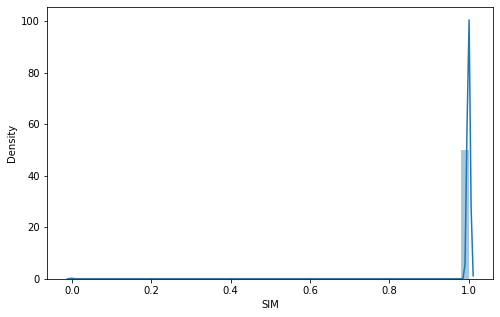

In [190]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(df_kend_train['SIM'])
plt.show()

In [191]:
df_kend_train['SIM'] = df_kend_train['SIM'].fillna(df_kend_train['SIM'].median())
df_kend_train = df_kend_train.fillna(df_kend_train.mean())

df_kend_train.isnull().sum()
# df_kend_train

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

## Delete Outlier

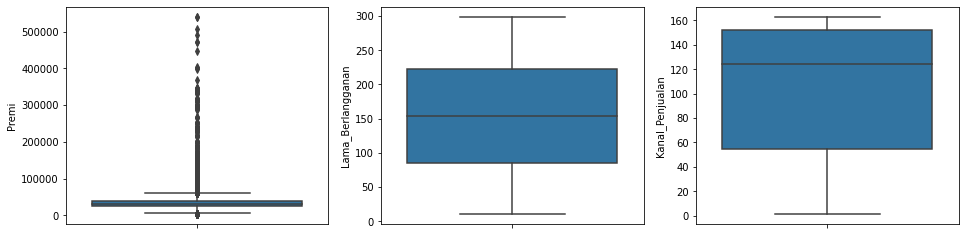

In [192]:
# fig = plt.figure(figsize =(10, 7))
fig, ax = plt.subplots(ncols=3, figsize=(16,4))
sns.boxplot(y='Premi', data=df_kend_train, ax=ax[0])
sns.boxplot(y='Lama_Berlangganan', data=df_kend_train, ax=ax[1])
sns.boxplot(y='Kanal_Penjualan', data=df_kend_train, ax=ax[2])
plt.show()

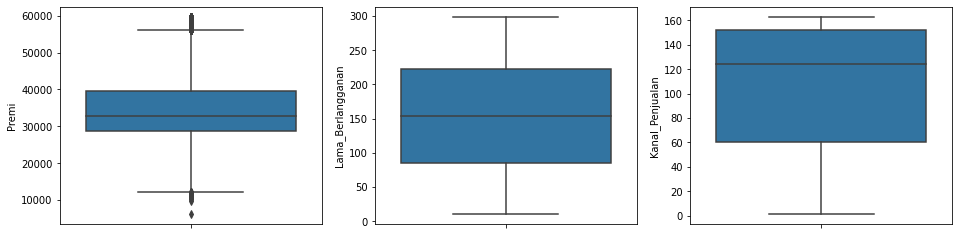

In [193]:
# columnName = [
#   'Premi', 'Lama_Berlangganan', 'Kanal_Penjualan'
# ]
# scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0), copy=True)
# df_kend_train[columnName] = scaler.fit_transform(df_kend_train[columnName])
q1 = df_kend_train['Premi'].quantile(0.25)
q2 = df_kend_train['Premi'].quantile(0.75)
interquartile = q2-q1
BB = q1 - (1.5 * interquartile)
BA = q2 + (1.5 * interquartile)

df_kend_train = df_kend_train[~((df_kend_train['Premi'] < BB) | (df_kend_train['Premi'] > BA))]

fig, ax = plt.subplots(ncols=3, figsize=(16,4))
sns.boxplot(y='Premi', data=df_kend_train, ax=ax[0])
sns.boxplot(y='Lama_Berlangganan', data=df_kend_train, ax=ax[1])
sns.boxplot(y='Kanal_Penjualan', data=df_kend_train, ax=ax[2])
plt.show()

## MinMax Scaler

In [196]:
columnName = [
  'Premi', 'Lama_Berlangganan', 'Umur', 'Kode_Daerah', 'Kanal_Penjualan', 'Jenis_Kelamin'
  , 'SIM', 'Kendaraan_Rusak', 'Sudah_Asuransi', 'Umur_Kendaraan'
]

scaler = MinMaxScaler()
df_kend_train[columnName] = scaler.fit_transform(df_kend_train[columnName].values)
df_kend_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.000000,0.153846,1.0,0.634615,1.0,0.5,1.000000,0.409000,0.932099,0.301038
1,0.000000,0.430769,1.0,0.750000,0.0,1.0,0.000000,0.367431,0.172840,0.512111
2,0.459542,0.015385,1.0,0.884615,1.0,0.5,1.000000,0.496727,0.981481,0.377163
4,0.000000,0.461538,1.0,0.673077,0.0,1.0,0.495196,0.536338,0.537037,0.636678
5,0.000000,0.015385,1.0,0.673077,1.0,0.5,1.000000,0.310270,0.932099,0.557093


## Export Data to New CSV

In [195]:
df_kend_train.to_csv('dataset/kendaraan_train_clean.csv', index=False)